import libraries

In [1]:
import pandas as pd
from io import StringIO
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

Embedded Dataset

In [11]:

data_csv = """Soil_pH,Moisture,Temperature,Crop_Type
5.0,35,22,0
5.1,36,23,0
5.2,34,21,0
5.0,37,22,0
4.9,35,21,0
5.3,36,23,0
5.1,34,22,0
5.2,35,21,0
5.0,36,23,0
5.1,34,22,0
6.0,25,28,1
6.1,24,27,1
6.2,26,29,1
6.0,23,28,1
6.3,25,30,1
6.1,24,29,1
6.2,26,28,1
6.0,25,27,1
6.1,24,28,1
6.2,26,29,1
6.5,40,32,2
6.6,42,33,2
6.7,41,34,2
6.5,43,32,2
6.6,40,33,2
6.7,42,34,2
6.5,41,32,2
6.6,43,33,2
6.7,40,34,2
6.5,42,32,2
5.1,35,22,0
5.2,36,23,0
5.0,34,22,0
5.3,35,23,0
5.1,36,22,0
5.2,34,23,0
6.0,25,28,1
6.1,24,29,1
6.2,26,28,1
6.0,25,27,1
6.3,24,28,1
6.1,26,29,1
6.5,40,32,2
6.6,41,33,2
6.7,42,34,2
6.5,40,33,2
6.6,41,32,2
6.7,42,34,2
6.5,40,33,2
6.6,41,32,2
6.7,42,34,2
6.5,40,33,2
6.6,41,32,2
6.7,42,34,2
"""
data = pd.read_csv(StringIO(data_csv))
data.head()


,Soil_pH,Moisture,Temperature,Crop_Type
0,5.0,35,22,0
1,5.1,36,23,0
2,5.2,34,21,0
3,5.0,37,22,0
4,4.9,35,21,0


Encode Categorial Columns

In [12]:
label_encoders = {}
for column in data.select_dtypes(include='object').columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le
data.head()


,Soil_pH,Moisture,Temperature,Crop_Type
0,5.0,35,22,0
1,5.1,36,23,0
2,5.2,34,21,0
3,5.0,37,22,0
4,4.9,35,21,0


Split Features and Target

In [13]:
X = data.drop('Crop_Type', axis=1)
y = data['Crop_Type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


Train Model

In [14]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

Evaluate Model

In [15]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100:.2f}%\n")
print("Classification Report:\n")
print(classification_report(y_test, y_pred))


Accuracy: 100.00%

Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5

    accuracy                           1.00        17
   macro avg       1.00      1.00      1.00        17
weighted avg       1.00      1.00      1.00        17



Feature Importance Visualization

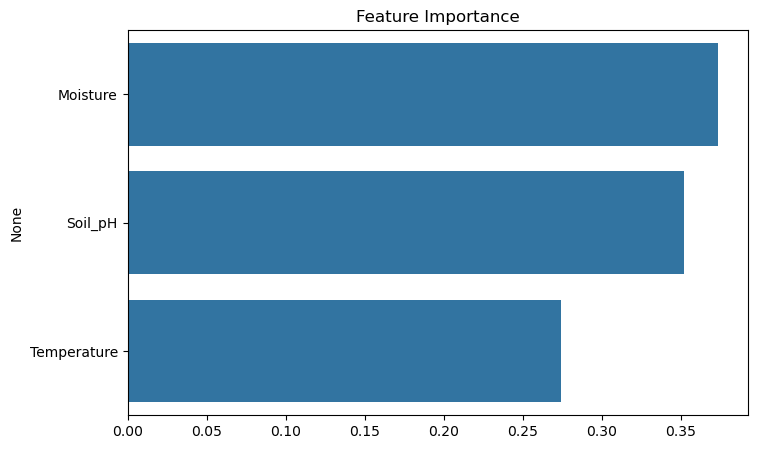

In [16]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(8,5))
sns.barplot(x=feat_importances.values, y=feat_importances.index)
plt.title('Feature Importance')
plt.show()